<a href="https://colab.research.google.com/github/mathcarl/Computational-AI/blob/main/AI_Assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assigment 1


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns






In [137]:
#Upload file from computer drive ( file name Credit_N400_p9.csv)
from google.colab import files
uploaded=files.upload()

Saving Credit_N400_p9.csv to Credit_N400_p9 (3).csv


In [138]:
import io
credit = pd.read_csv(io.BytesIO(uploaded['Credit_N400_p9.csv']))
# Dataset is now stored in a Pandas Dataframe

In [139]:
credit=credit.sample(frac=1).reset_index(drop=True)

In [179]:
# Changes categorical values to o or 1
credit['Gender']=credit['Gender'].astype('category')
credit['Student']=credit['Student'].astype('category')
credit['Married']=credit["Married"].astype("category")
cat_columns=credit.select_dtypes(['category']).columns
credit[cat_columns]=credit[cat_columns].apply(lambda x:x.cat.codes)


In [180]:
#Explore data
print(credit.head())
len(credit)

   Income  Limit  Rating  Cards  ...  Gender  Student  Married  Balance
0  30.682   1671     160      2  ...       0        0        0        0
1  14.956   4640     332      2  ...       1        0        0      681
2  30.413   3690     299      2  ...       0        1        0      728
3  21.551   5380     420      5  ...       1        0        1      907
4  29.564   2529     192      1  ...       0        0        1        0

[5 rows x 10 columns]


400

In [181]:
# select independent and dependent variables
X=credit.drop(['Balance'],axis=1)
y=credit['Balance']


In [182]:
# creates a function to be recalled to standardize the data
def standardize(X):
  credit1=(X-X.mean())/X.std() # centralize and standardize the independent values
  return credit1
def centered_y(y):
  credit2=y-y.mean()# centralize the response values
  return credit2


In [183]:
# center and standardize the data
X=standardize(X) # assign the standardization to the independent values in the list
y=centered_y(y) # assign the centered function to the response values
X# print standardize data

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married
0,-0.412461,-1.327702,-1.259920,-0.698255,1.236681,-2.063863,-0.964384,-0.332916,-1.255665
1,-0.858661,-0.041418,-0.148264,-0.698255,-1.314073,-2.383842,1.034339,-0.332916,-1.255665
2,-0.420093,-0.452994,-0.361547,-0.698255,-1.777846,0.495967,-0.964384,2.996248,-1.255665
3,-0.671538,0.279179,0.420490,1.489490,-0.270583,1.455904,1.034339,-0.332916,0.794400
4,-0.444182,-0.955983,-1.053100,-1.427504,-1.487988,-0.463969,-0.964384,-0.332916,0.794400
...,...,...,...,...,...,...,...,...,...
395,-0.808866,0.233255,0.207207,0.030993,-0.792328,0.815946,-0.964384,-0.332916,0.794400
396,-0.789543,-0.861104,-0.820428,0.030993,-1.372044,0.175988,1.034339,-0.332916,0.794400
397,-0.257542,-1.249286,-1.111268,0.030993,-1.314073,-0.143990,-0.964384,-0.332916,-1.255665
398,-0.420292,-1.133178,-1.124194,-0.698255,1.352624,0.175988,1.034339,-0.332916,0.794400


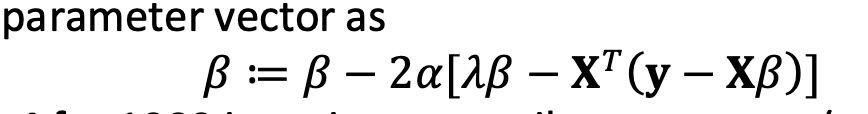

In [145]:
#Create a function for the parameter vector 
def gradient(X,y,alpha,lamb,beta):

  

  lambbeta=np.dot(lamb,beta)# matrix multiplication for lambda and beta

  xst=np.transpose(X) # transpose the X values

  xsbeta=np.dot(X,beta) # matrix multiplication for X and beta

  prediction=np.subtract(y,xsbeta) # subtract xbeta  from y

  prediction2=np.dot(xst,prediction) # combines and multiply previous defined variables
  
  beta2=np.dot(2*alpha,(np.subtract(lambbeta,prediction2)))
  beta =np.subtract(beta,beta2)# total combination of the parameter vector
  return beta # return the beta values from the parameter function


 
   
  

In [146]:
lambdas=[10**-2,10**-1,10**0,10**1,10**2,10**3,10**4] # seven preditermined values of lambda
beta_list=[] # empty list for beta values
# calculate the gradient decent function to find the beta values for the given lambdas
for lamb in lambdas:
  beta=np.random.uniform(-1,1,X.shape[1])# initialize beta with random number from -1 to 1
  for i in range(1000): # perform 1000 iterations
    beta_hat=gradient(X,y,10**-5,lamb,beta) # apply the function gradient
    beta=beta_hat # save the beta values
  beta_list.append(beta)# create a list of the beta values
  betalist=pd.DataFrame(beta_list)# convert to a data frame
betalist # print  the beta list

,0,1,2,3,4,5,6,7,8
0,-227.510008,289.512243,284.170402,22.110792,-16.866383,-2.013060,3.677100,125.326260,-5.485700
1,-227.255957,289.235479,284.185978,22.112077,-16.881345,-2.008617,3.669083,125.290195,-5.489426
2,-225.116934,287.861636,283.307846,22.147926,-16.981357,-1.979127,3.603047,124.954538,-5.509558
3,-206.585911,277.597683,273.656846,22.430658,-17.673440,-1.740076,3.036004,121.788548,-5.629663
4,-91.235623,209.863300,208.329876,22.615793,-19.597737,-0.406081,-0.332483,97.597906,-5.818044
5,22.974251,84.063238,84.202757,10.261706,-5.683981,-0.100476,-1.993705,33.983938,-1.956860
6,7.300327,14.426757,14.459044,1.499893,-0.127477,-0.114057,-0.363408,4.568672,-0.133970


#Deliverable 1: 
Illustrate the effect of the tuning parameter on the inferred ridge regression coefficients by generating a plot (e.g., using Excel, Matlab, R, etc.) of nine lines (one for each
̂
of the 𝑝 = 9 features), with the 𝑦-axis as 𝛽 , 𝑗 = 1,2, ... ,9, and the 𝑥-axis the corresponding
𝑁
̂
12𝑝
temp temp
temp
𝑗
 𝑗
̂
log-scaled tuning parameter value log (𝜆) that generated the particular 𝛽 . Label both
10 𝑗
axes. Without the log scaling of the tuning parameter, the plot will look distorted.

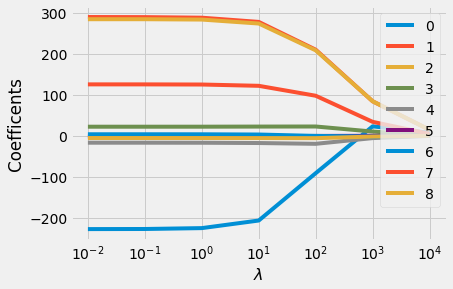

In [147]:
# plot results for beta values
betas=pd.DataFrame(beta_list)
betas.index=lambdas
pd.DataFrame(betas,columns=X.columns[0:-1])



with plt.style.context('fivethirtyeight'):
  betas.plot()
  plt.xscale("log")
  plt.xlabel(r'$\lambda$',fontsize=16)
  plt.ylabel('Coefficents')
  plt.legend(loc='upper right')
  plt.show()


#Deliverable 2:
 Illustrate the effect of the tuning parameter on the cross validation error by generating a plot (e.g., using Excel, Matlab, R, etc.) with the 𝑦-axis as CV error, and the 𝑥-
axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the
particular CV error. Label both axes. Without the log scaling of the tuning parameter, the (5)
plot will look distorted.

In [148]:
# code for deliverable 2
df=credit=credit.sample(frac=1).reset_index(drop=True)
  
 


In [165]:
 def cross_split(X,y,numfold):
      
       
       # Step 1 split the data 80/20
       validation = df[numfold*80:((numfold+1)*80)]
       train = pd.concat([df[:numfold*80],df[((numfold+1)*80):]])
       
       
       # Select training the data and drop Balance response variable     
       rX_train=train.drop(['Balance'],axis=1)
       ry_train=train['Balance']
       # Step 2 Centralize and standardize the data
       X_train=(rX_train-rX_train.mean())/rX_train.std()
       y_train=ry_train-ry_train.mean()
       # Select validation data and drop the response variable
       rX_val=validation.drop(['Balance'],axis=1)
       ry_val=validation['Balance']
       # centralize and standardize the data
       X_val=(rX_val-rX_train.mean())/rX_train.std()
       y_val=ry_val-ry_train.mean()
       
       
       return X_train,y_train,X_val,y_val


In [166]:
# Create function to predict for MSE later on
def predict(val,beta):
  prediction=np.dot(val,beta)
  return prediction

In [167]:
# create the MSE function to be used after gradient decent
def mse(y_true,y_pred):
  error=(np.sum((y_true-y_pred)**2))/len(y_true)
  return error

In [168]:
# previously created gradient function
def gradient(X,y,alpha,lamb,beta):

  

  lambbeta=np.dot(lamb,beta)

  xst=np.transpose(X)

  xsbeta=np.dot(X,beta)

  prediction=np.subtract(y,xsbeta)

  prediction2=np.dot(xst,prediction)
  
  beta2=np.dot(2*alpha,(np.subtract(lambbeta,prediction2)))
  beta =np.subtract(beta,beta2)
  return beta

In [190]:
lambdas=[10**-2,10**-1,10**0,10**1,10**2,10**3,10**4] # 
error_list=[]


# step 3 apply gradient decent to training values

for i in range(5): # Use the cross split to extract the 5 folds
   X_train,y_train,X_val,y_val=cross_split(X,y,i)
   #print(X_train)
   
   for lamb in lambdas:
       beta=np.random.uniform(-1,1,X_train.shape[1]) # initialize beta values from -1 to 1
   
 # loop to go over the seven lambdas 
       for k in range(1000): # apply gradient to training data
          betahat=gradient(X_train,y_train,10**-5,lamb,beta)
          beta=betahat
      
  
# step 4 apply MSE      
# apply MSE to the validation data and create a list       
# MSE formula 
       prediction=predict(X_val,beta)
       errors=mse(y_val,prediction)
       
       
       error_list.append(errors)
       
       print(error_list)
       
       
        
      
   
      
      
     


[13386.649987012803]
[13386.649987012803, 13396.228039058862]
[13386.649987012803, 13396.228039058862, 13461.510254289577]
[13386.649987012803, 13396.228039058862, 13461.510254289577, 14308.727813130283]
[13386.649987012803, 13396.228039058862, 13461.510254289577, 14308.727813130283, 28290.276326552772]
[13386.649987012803, 13396.228039058862, 13461.510254289577, 14308.727813130283, 28290.276326552772, 101505.94650999596]
[13386.649987012803, 13396.228039058862, 13461.510254289577, 14308.727813130283, 28290.276326552772, 101505.94650999596, 188737.88407161218]
[13386.649987012803, 13396.228039058862, 13461.510254289577, 14308.727813130283, 28290.276326552772, 101505.94650999596, 188737.88407161218, 11547.741341466983]
[13386.649987012803, 13396.228039058862, 13461.510254289577, 14308.727813130283, 28290.276326552772, 101505.94650999596, 188737.88407161218, 11547.741341466983, 11586.433148058013]
[13386.649987012803, 13396.228039058862, 13461.510254289577, 14308.727813130283, 28290.2763

In [191]:
len(error_list)

35

In [192]:
# extract values from error list 
# values for every fold are  spread 7 values  from each
# find the avarage of every fold 
#errort=(error_list[0],error_list[9],error_list[18],error_list[27],error_list[36])
error1=(error_list[0]+error_list[7]+error_list[14]+error_list[21]+error_list[28])/5
error2=(error_list[1]+error_list[8]+error_list[15]+error_list[22]+error_list[29])/5
error3=(error_list[2]+error_list[9]+error_list[16]+error_list[23]+error_list[30])/5
error4=(error_list[3]+error_list[10]+error_list[17]+error_list[24]+error_list[31])/5
error5=(error_list[4]+error_list[11]+error_list[18]+error_list[25]+error_list[32])/5
error6=(error_list[5]+error_list[12]+error_list[19]+error_list[26]+error_list[33])/5
error7=(error_list[6]+error_list[13]+error_list[20]+error_list[27]+error_list[34])/5
#error8=(error_list[7]+error_list[16]+error_list[25]+error_list[34]+error_list[43])/5
#error9=(error_list[8]+error_list[17]+error_list[26]+error_list[35]+error_list[44])/5
# create a list of the avg of the errors
error_avg=[error1,error2,error3,error4,error5,error6,error7]
#print(error1)
errors=pd.DataFrame(error_avg)
print(errors)


               0
0   12520.740519
1   12536.230668
2   12655.267176
3   14003.139043
4   31230.982125
5  107189.423128
6  191200.822863


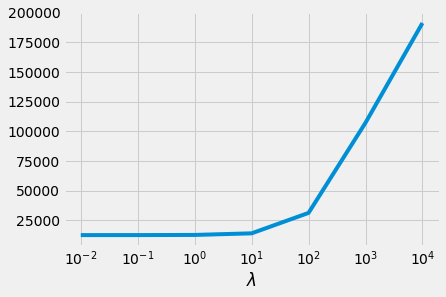

In [193]:
# plot the values for  the MSE


with plt.style.context('fivethirtyeight'):

  plt.plot(lambdas,error_avg)
  plt.xscale('log')
  plt.xlabel('$\lambda$')
  plt.show()


#Deliverable 3: 
Indicate the value of 𝜆 that generated the smallest CV(5) error.

The smallest CV(5) values are: 10^-2.

##Deliverable 4:
 Given the optimal 𝜆, retrain your model on the entire dataset of 𝑁 = 400 observations and provide the estimates of the 𝑝 = 9 best-fit model parameters.
 Beta values= -227.33,289.55,283.97,22.13,-16.89,-2.01,3.67,125.32,-5.49

In [198]:

beta_list=[]

# Run Model using the best parameters
beta=np.random.uniform(-1,1,X.shape[1])
for i in range(1000):
    beta_hat=gradient(X,y,10**-5,10**-2,beta)
    beta=beta_hat
beta_list.append(beta)
betalist=pd.DataFrame(beta_list)


Beta values= -227.33,289.55,283.97,22.13,-16.89,-2.01,3.67,125.32,-5.49

In [199]:
betalist

,0,1,2,3,4,5,6,7,8
0,-227.331432,288.738728,284.784438,22.093079,-16.889553,-2.006238,3.671093,125.314033,-5.495546


#Deliverable 5: 
Provide all your source code that you wrote from scratch to perform all analyses (aside from plotting scripts, which you do not need to turn in) in this assignment, along with instructions on how to compile and run your code.

Code was given thru out the assigment and explained with comments.